In [4]:
import cv2
import sys
import pandas as pd
import numpy as np
from PIL import Image

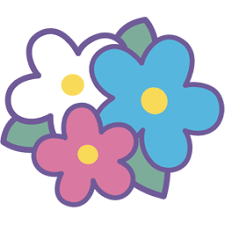

In [15]:
image = Image.open('flowers.png').convert('RGB')
image

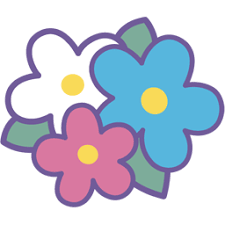

In [68]:
image = Image.open('flowers.png').convert('RGB')
result = image.convert('P', palette=Image.ADAPTIVE, colors=100)
result

In [91]:
# Make into Numpy array
na = np.array(result)
# Arrange all pixels into a tall column of 3 RGB values and find unique rows (colours)
colours, counts = np.unique(na.reshape(-1,3), axis=0, return_counts=1)
print(colours.shape)
print(colours)
print(counts)

(1643, 3)
[[ 0  0  0]
 [ 0  0  1]
 [ 0  0  2]
 ...
 [99 99 97]
 [99 99 98]
 [99 99 99]]
[8274    1   29 ...    1    1    4]


In [74]:
import csv
from scipy import spatial as sp

DMC_CSV = "dmc.csv"

dmc_colors = []
with open(DMC_CSV, newline="") as csvfile:
    reader = csv.DictReader(csvfile)
    for index, row in enumerate(reader):
        dmc_colors.append(
            {
                "index": index,
                "floss": "#" + row["floss#"],
                "description": row["description"],
                "red": int(row["red"]),
                "green": int(row["green"]),
                "blue": int(row["blue"]),
                "hex": "#" + row["hex"],
                "dmc_row": row["row"],
            }
        )
rgb_colors = []
for color in dmc_colors:
    rgb_colors.append((color["red"], color["green"], color["blue"]))
# print(dmc_colors)

In [75]:
def rgb_to_dmc(r, g, b):
    tree = sp.KDTree(rgb_colors)
    # don't need the Euclidean distance only the index
    _, result = tree.query((r, g, b))
    return dmc_colors[result]

In [76]:
rgb_to_dmc(14,14,12)

{'index': 407,
 'floss': '#3371',
 'description': 'Black Brown',
 'red': 30,
 'green': 17,
 'blue': 8,
 'hex': '#1E1108',
 'dmc_row': 'row 17-18'}

In [134]:
colours_list = [(rgb_to_dmc(element[0], element[1], element[2])) for element in colours]
print(len(colours_list))
colours_list

1643


[{'index': 453,
  'floss': '#310',
  'description': 'Black',
  'red': 0,
  'green': 0,
  'blue': 0,
  'hex': '#0',
  'dmc_row': 'row 19-16'},
 {'index': 453,
  'floss': '#310',
  'description': 'Black',
  'red': 0,
  'green': 0,
  'blue': 0,
  'hex': '#0',
  'dmc_row': 'row 19-16'},
 {'index': 453,
  'floss': '#310',
  'description': 'Black',
  'red': 0,
  'green': 0,
  'blue': 0,
  'hex': '#0',
  'dmc_row': 'row 19-16'},
 {'index': 453,
  'floss': '#310',
  'description': 'Black',
  'red': 0,
  'green': 0,
  'blue': 0,
  'hex': '#0',
  'dmc_row': 'row 19-16'},
 {'index': 453,
  'floss': '#310',
  'description': 'Black',
  'red': 0,
  'green': 0,
  'blue': 0,
  'hex': '#0',
  'dmc_row': 'row 19-16'},
 {'index': 453,
  'floss': '#310',
  'description': 'Black',
  'red': 0,
  'green': 0,
  'blue': 0,
  'hex': '#0',
  'dmc_row': 'row 19-16'},
 {'index': 453,
  'floss': '#310',
  'description': 'Black',
  'red': 0,
  'green': 0,
  'blue': 0,
  'hex': '#0',
  'dmc_row': 'row 19-16'},
 {'ind

In [83]:
unique_colours_list = [dict(t) for t in {tuple(d.items()) for d in colours_list}]
len(unique_colours_list)

40

In [98]:
# from collections import Counter
# data = Counter(colours_list)
# data.most_common()   # Returns all unique items and their counts
# data.most_common(1)  # Returns the highest occurring item

seq = [x['floss'] for x in colours_list]

print(len(seq))
print(seq)

1643
['#310', '#310', '#310', '#310', '#310', '#310', '#310', '#310', '#310', '#310', '#310', '#310', '#310', '#310', '#310', '#939', '#939', '#310', '#310', '#310', '#310', '#310', '#310', '#310', '#310', '#310', '#310', '#939', '#939', '#939', '#310', '#310', '#310', '#310', '#939', '#939', '#939', '#939', '#939', '#939', '#939', '#310', '#310', '#310', '#939', '#939', '#939', '#939', '#939', '#939', '#310', '#310', '#310', '#310', '#939', '#939', '#939', '#939', '#939', '#939', '#939', '#310', '#939', '#939', '#939', '#939', '#939', '#939', '#939', '#939', '#939', '#939', '#939', '#939', '#939', '#939', '#939', '#939', '#939', '#820', '#820', '#820', '#820', '#820', '#820', '#820', '#820', '#820', '#820', '#820', '#820', '#820', '#796', '#310', '#310', '#310', '#310', '#310', '#310', '#310', '#310', '#310', '#310', '#939', '#310', '#310', '#310', '#310', '#939', '#939', '#820', '#820', '#820', '#820', '#820', '#820', '#820', '#820', '#820', '#820', '#820', '#310', '#310', '#310', '#

In [124]:
# https://docs.python.org/3/library/collections.html#collections.Counter
from collections import Counter
floss_counts = Counter(seq)
floss_counts

Counter({'#310': 86,
         '#939': 125,
         '#820': 54,
         '#796': 3,
         '#500': 4,
         '#311': 48,
         '#3371': 108,
         '#890': 2,
         '#909': 4,
         '#934': 95,
         '#823': 22,
         '#938': 63,
         '#3799': 80,
         '#3750': 117,
         '#986': 4,
         '#501': 22,
         '#3808': 4,
         '#791': 16,
         '#3031': 99,
         '#844': 18,
         '#898': 39,
         '#930': 3,
         '#413': 193,
         '#154': 18,
         '#838': 56,
         '#3021': 13,
         '#309': 22,
         '#924': 15,
         '#936': 34,
         '#3051': 32,
         '#839': 27,
         '#300': 41,
         '#801': 34,
         '#3787': 55,
         '#937': 11,
         '#535': 66,
         '#987': 2,
         '#779': 6,
         '#904': 1,
         '#814': 1})

In [125]:
floss_counts.most_common()

[('#413', 193),
 ('#939', 125),
 ('#3750', 117),
 ('#3371', 108),
 ('#3031', 99),
 ('#934', 95),
 ('#310', 86),
 ('#3799', 80),
 ('#535', 66),
 ('#938', 63),
 ('#838', 56),
 ('#3787', 55),
 ('#820', 54),
 ('#311', 48),
 ('#300', 41),
 ('#898', 39),
 ('#936', 34),
 ('#801', 34),
 ('#3051', 32),
 ('#839', 27),
 ('#823', 22),
 ('#501', 22),
 ('#309', 22),
 ('#844', 18),
 ('#154', 18),
 ('#791', 16),
 ('#924', 15),
 ('#3021', 13),
 ('#937', 11),
 ('#779', 6),
 ('#500', 4),
 ('#909', 4),
 ('#986', 4),
 ('#3808', 4),
 ('#796', 3),
 ('#930', 3),
 ('#890', 2),
 ('#987', 2),
 ('#904', 1),
 ('#814', 1)]

In [174]:
floss_use_percentage = [
    (i, floss_counts[i] / len(colours) * 100.0)
    for i  in floss_counts]
floss_use_percentage

[('#310', 5.234327449786975),
 ('#939', 7.608034083992695),
 ('#820', 3.2866707242848445),
 ('#796', 0.18259281801582472),
 ('#500', 0.24345709068776628),
 ('#311', 2.9214850882531955),
 ('#3371', 6.573341448569689),
 ('#890', 0.12172854534388314),
 ('#909', 0.24345709068776628),
 ('#934', 5.782105903834449),
 ('#823', 1.3390139987827145),
 ('#938', 3.8344491783323194),
 ('#3799', 4.869141813755325),
 ('#3750', 7.121119902617163),
 ('#986', 0.24345709068776628),
 ('#501', 1.3390139987827145),
 ('#3808', 0.24345709068776628),
 ('#791', 0.9738283627510651),
 ('#3031', 6.0255629945222156),
 ('#844', 1.0955569080949483),
 ('#898', 2.373706634205721),
 ('#930', 0.18259281801582472),
 ('#413', 11.746804625684723),
 ('#154', 1.0955569080949483),
 ('#838', 3.408399269628728),
 ('#3021', 0.7912355447352405),
 ('#309', 1.3390139987827145),
 ('#924', 0.9129640900791236),
 ('#936', 2.069385270846013),
 ('#3051', 1.9476567255021302),
 ('#839', 1.6433353621424223),
 ('#300', 2.495435179549604),
 ('#

In [180]:
limit_low_occuring_threads = 2  # %
filtered_floss_list = [
    color for color in floss_use_percentage if color[1] > limit_low_occuring_threads
]
filtered_floss_list

[('#310', 5.234327449786975),
 ('#939', 7.608034083992695),
 ('#820', 3.2866707242848445),
 ('#311', 2.9214850882531955),
 ('#3371', 6.573341448569689),
 ('#934', 5.782105903834449),
 ('#938', 3.8344491783323194),
 ('#3799', 4.869141813755325),
 ('#3750', 7.121119902617163),
 ('#3031', 6.0255629945222156),
 ('#898', 2.373706634205721),
 ('#413', 11.746804625684723),
 ('#838', 3.408399269628728),
 ('#936', 2.069385270846013),
 ('#300', 2.495435179549604),
 ('#801', 2.069385270846013),
 ('#3787', 3.3475349969567865),
 ('#535', 4.017041996348144)]

In [193]:
unique_colours_list

[{'index': 261,
  'floss': '#3051',
  'description': 'Green Gray Dk',
  'red': 95,
  'green': 102,
  'blue': 72,
  'hex': '#5F6648',
  'dmc_row': 'row 11-22'},
 {'index': 228,
  'floss': '#890',
  'description': 'Pistachio Grn Ult V D',
  'red': 23,
  'green': 73,
  'blue': 35,
  'hex': '#184923',
  'dmc_row': 'row 10-14'},
 {'index': 126,
  'floss': '#796',
  'description': 'Royal Blue Dark',
  'red': 17,
  'green': 65,
  'blue': 109,
  'hex': '#11416D',
  'dmc_row': 'row 06-09'},
 {'index': 214,
  'floss': '#500',
  'description': 'Blue Green Vy Dk',
  'red': 4,
  'green': 77,
  'blue': 51,
  'hex': '#044D33',
  'dmc_row': 'row 09-27'},
 {'index': 453,
  'floss': '#310',
  'description': 'Black',
  'red': 0,
  'green': 0,
  'blue': 0,
  'hex': '#0',
  'dmc_row': 'row 19-16'},
 {'index': 233,
  'floss': '#986',
  'description': 'Forest Green Vy Dk',
  'red': 64,
  'green': 82,
  'blue': 48,
  'hex': '#405230',
  'dmc_row': 'row 10-19'},
 {'index': 22,
  'floss': '#814',
  'description

TODO: add colour name to the filtered_floss_list

In [194]:
# with_dmc = [
#     f"{dmc_colors[color[0]]['floss']} {dmc_colors[color[0]]['description']} {round(color[1], 2)}%"
#     for color in filtered_floss_list
# ]

In [195]:
# colours_list = {(get_color_name(element[0], element[1], element[2]))for element in colours}

# colours_list